<a href="https://colab.research.google.com/github/shezamd/Gender-prediction-model/blob/master/Maths_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

names = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '] 


data = np.genfromtxt('/content/drive/MyDrive/Admission Data/Admission_Predict_Ver1.1.csv', delimiter=',') # read the data
my_data = pd.read_csv('/content/drive/MyDrive/Admission Data/Admission_Predict_Ver1.1.csv',names=names) #read the data


X_train = my_data.iloc[1:400,0:7]
X_test = my_data.iloc[401:,0:7]

y_train = data[1:400, -1].reshape(-1,1)
y_test = data[401:, -1].reshape(-1,1)

#Inilising the weights
theta = np.zeros([1,8])

#Normalising data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
ones_1 = np.ones([X_test.shape[0], 1])
X_test = np.concatenate((ones_1,X_test),axis=1)

#Loss function
def SSE(X,y,theta):
    summed = np.power(((X @ theta.T)-y),2)
    return np.sum(summed) * 0.5


[[0.33653246 0.1182764  0.12212137 0.05824123 0.08048286 0.12098008
  0.15422131 0.02310858]]
0.048211793606543915
0.8717323944703783


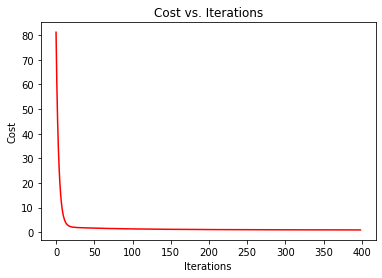

In [13]:
#Standart Gradient descent
rate  = 0.0001
def StandartGradientDescent(X,y,theta,rate):
    cost = np.zeros(len(X))
    for i in range(len(X)):
        theta = theta - rate * np.sum((X @ theta.T - y) * X, axis=0)
        cost[i] = SSE(X, y, theta)
    return theta,cost

#Run the gd and cost function
weights, cost = StandartGradientDescent(X_train,y_train,theta,rate)
print(weights)

#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(len(X_train)), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Cost vs. Iterations') 

#Testing 
y_pred = weights @ X_test.T
y_test = np.squeeze(np.asarray(y_test)) ##Convert matrix to array
y_pred = np.squeeze(np.asarray(y_pred))

#Root Mean Square Error(RMSE)
def RMSE(y_pred, y_test):
  N = len(y_test)
  rmse = sum((y_test - y_pred)**2)/N
  rmse = np.sqrt(rmse)
  return rmse

print(RMSE(y_pred, y_test))

#R Square  
def r_squared(y_pred, y_test):
    y_mean = sum(y_test)/len(y_test)
    RSS = sum((y_test - y_pred)**2)
    TSS = sum((y_test - y_mean)**2)
    return (1 - (RSS/TSS))

print(r_squared(y_pred, y_test))

[[0.26771685 0.12446681 0.12810703 0.10648708 0.12458409 0.13172336
  0.13356464 0.07260058]]
0.0651561986057663
0.7657271898800879


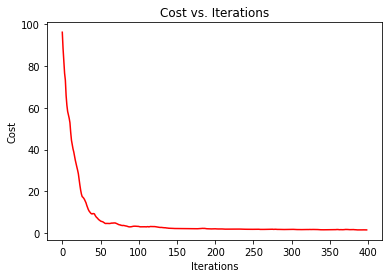

In [14]:
#Stochastic Gradient Descent 

rate = 0.01
def StochasticGradientDescent(X,y,theta, rate):
    cost = np.zeros(len(X))
    for i in range(len(X)):
        theta  = theta - rate * ((X[i] @ theta.T - y[i]) *  X[i])   
        cost[i] = SSE(X, y, theta)
    return theta, cost

#Run the gd and cost function
weights, cost = StochasticGradientDescent(X_train,y_train,theta, rate)
print(weights)

#Plot cost vs iteration graph
fig, ax = plt.subplots()  
ax.plot(np.arange(len(X_train)), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Cost vs. Iterations') 

#Testing 
y_pred = weights @ X_test.T
y_test = np.squeeze(np.asarray(y_test)) ##Convert matrix to array
y_pred = np.squeeze(np.asarray(y_pred))

#Root Mean Square Error(RMSE)
def RMSE(y_pred, y_test):
  N = len(y_test)
  rmse = sum((y_test - y_pred)**2)/N
  rmse = np.sqrt(rmse)
  return rmse

print(RMSE(y_pred, y_test))

#R Square  
def r_squared(y_pred, y_test):
    y_mean = sum(y_test)/len(y_test)
    RSS = sum((y_test - y_pred)**2)
    TSS = sum((y_test - y_mean)**2)
    return (1 - (RSS/TSS))

print(r_squared(y_pred, y_test))


[[0.26857014 0.12474627 0.12823596 0.105744   0.12423277 0.13107185
  0.13357258 0.07232364]]
0.06485990393780863
0.7678530338688668


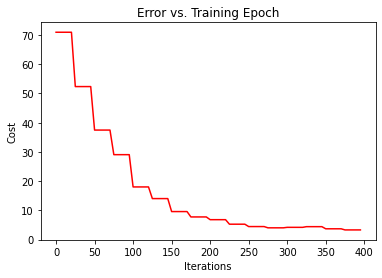

In [20]:
#Mini-batch Gradient Descent

rate = 0.01
batch = 5
def MBGradientDescent(X,y,theta, rate, batch):
    cost = np.zeros(400//batch)
    for i in range(0 , 400, batch):
        theta = theta - rate * np.sum((X[i:i+batch] @ theta.T - y[i:i+batch]) * X[i:i+batch], axis=0)  
        cost[i:i+batch] = SSE(X, y, theta)
    return theta ,cost

#Run the GD and cost function
weights, cost = MBGradientDescent(X_train,y_train,theta ,rate ,batch)
print(weights)

#Plot cost vs iteration graph
fig, ax = plt.subplots()  
ax.plot(np.arange(0, 400, batch), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

#Testing 
y_pred = weights @ X_test.T
y_test = np.squeeze(np.asarray(y_test)) ##Convert matrix to array
y_pred = np.squeeze(np.asarray(y_pred))

#Root Mean Square Error(RMSE)
def RMSE(y_pred, y_test):
  N = len(y_test)
  rmse = sum((y_test - y_pred)**2)/N
  rmse = np.sqrt(rmse)
  return rmse

print(RMSE(y_pred, y_test))

#R Square  
def r_squared(y_pred, y_test):
    y_mean = sum(y_test)/len(y_test)
    RSS = sum((y_test - y_pred)**2)
    TSS = sum((y_test - y_mean)**2)
    return (1 - (RSS/TSS))

print(r_squared(y_pred, y_test))